Mini Project 1 - 

Aim- Look at the Correlation between Qualifying Race Wins and Winning the Race for McLaren Drivers Lando Norris and Oscar Piastri from 2022 to 2024

Business Question: Is there a Correleation to Qualifying Q3 to Winning a Race based on Lando Norris and Oscar's performance

Hypothese Analysis:

1. Qualifying position is a strong predictor of race performance

In [ ]:
#Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set_context("poster")
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style("whitegrid")

%matplotlib inline

In [7]:
quali = pd.read_csv(r'C:\Users\ryoko\OneDrive\Documents\Data Sciecne Course Files\Answered LAB\Mini-Project-1-RyoS\F1 DATA\qualifying.csv')
races = pd.read_csv(r'C:\Users\ryoko\OneDrive\Documents\Data Sciecne Course Files\Answered LAB\Mini-Project-1-RyoS\F1 DATA\races.csv')
drivers = pd.read_csv(r'C:\Users\ryoko\OneDrive\Documents\Data Sciecne Course Files\Answered LAB\Mini-Project-1-RyoS\F1 DATA\drivers.csv')
results = pd.read_csv(r'C:\Users\ryoko\OneDrive\Documents\Data Sciecne Course Files\Answered LAB\Mini-Project-1-RyoS\F1 DATA\results.csv')

In [3]:
#filter races data to only Year 2022-2023, with Constructor Id Mclaren

# Filter rows where the 'year' column is between 2022 and 2024
filtered_df = races[(races['year'] >= 2022) & (races['year'] <= 2024)]

# Extract the 'raceID' column values
race_ids = filtered_df['raceId'].tolist()

# Print the raceIDs
print(race_ids)

[1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1091, 1092, 1093, 1094, 1095, 1096, 1098, 1099, 1100, 1101, 1102, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144]


In [4]:
# Filter the DataFrame for Quali 
filtered_quali_df = quali[quali['raceId'].isin(race_ids)]

# Save the new DataFrame to a CSV file or process it further as needed
filtered_quali_df.to_csv('filtered_quali.csv', index=False)

# Filter the DataFrame where 'constructorID' is equal to 1
filtered_data = filtered_quali_df[filtered_quali_df['constructorId'] == 1]

# Select only the required columns from drivers
drivers_subset = drivers[["driverId", "surname"]]

# Merge with filterd_data
filtered_data = filtered_data.merge(drivers_subset, on="driverId", how="left")

filtered_data = filtered_data.drop(columns=["driverId"])

# Re-Order the Filtered Data
filtered_quali_df = filtered_data[["qualifyId", "raceId", "constructorId","number","surname","position","q1","q2","q3"]]
filtered_quali_df

,qualifyId,raceId,constructorId,number,surname,position,q1,q2,q3
0,9188,1074,1,4,Norris,13,1:32.239,1:32.008,\N
1,9193,1074,1,3,Ricciardo,18,1:32.945,\N,\N
2,9224,1075,1,3,Ricciardo,12,1:30.009,1:29.773,\N
3,9223,1075,1,4,Norris,11,1:29.957,1:29.651,\N
4,9236,1076,1,4,Norris,4,1:19.280,1:19.066,1:18.703
...,...,...,...,...,...,...,...,...,...
131,10499,1142,1,81,Piastri,8,1:33.450,1:33.024,1:33.033
132,10514,1143,1,4,Norris,3,1:21.578,1:20.983,1:20.772
133,10515,1143,1,81,Piastri,4,1:21.821,1:21.121,1:20.829
134,10532,1144,1,4,Norris,1,1:23.682,1:23.098,1:22.595


In [5]:
#filter addeding raceId data on raceyear and location into filtered_quali_df

#races subset only need "year" and "name"
races_subset = races[["raceId","year","name"]]
filtered_quali_df = filtered_quali_df.merge(races_subset,  how="left", suffixes=("_filtered", "_races"))

filtered_quali_df

,qualifyId,raceId,constructorId,number,surname,position,q1,q2,q3,year,name
0,9188,1074,1,4,Norris,13,1:32.239,1:32.008,\N,2022,Bahrain Grand Prix
1,9193,1074,1,3,Ricciardo,18,1:32.945,\N,\N,2022,Bahrain Grand Prix
2,9224,1075,1,3,Ricciardo,12,1:30.009,1:29.773,\N,2022,Saudi Arabian Grand Prix
3,9223,1075,1,4,Norris,11,1:29.957,1:29.651,\N,2022,Saudi Arabian Grand Prix
4,9236,1076,1,4,Norris,4,1:19.280,1:19.066,1:18.703,2022,Australian Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...
131,10499,1142,1,81,Piastri,8,1:33.450,1:33.024,1:33.033,2024,Las Vegas Grand Prix
132,10514,1143,1,4,Norris,3,1:21.578,1:20.983,1:20.772,2024,Qatar Grand Prix
133,10515,1143,1,81,Piastri,4,1:21.821,1:21.121,1:20.829,2024,Qatar Grand Prix
134,10532,1144,1,4,Norris,1,1:23.682,1:23.098,1:22.595,2024,Abu Dhabi Grand Prix


In [6]:
#re-order the columns
quali_data_df2 = filtered_quali_df[["year","name","constructorId","number","surname","position","q1","q2","q3"]]
quali_data_df2

,year,name,constructorId,number,surname,position,q1,q2,q3
0,2022,Bahrain Grand Prix,1,4,Norris,13,1:32.239,1:32.008,\N
1,2022,Bahrain Grand Prix,1,3,Ricciardo,18,1:32.945,\N,\N
2,2022,Saudi Arabian Grand Prix,1,3,Ricciardo,12,1:30.009,1:29.773,\N
3,2022,Saudi Arabian Grand Prix,1,4,Norris,11,1:29.957,1:29.651,\N
4,2022,Australian Grand Prix,1,4,Norris,4,1:19.280,1:19.066,1:18.703
...,...,...,...,...,...,...,...,...,...
131,2024,Las Vegas Grand Prix,1,81,Piastri,8,1:33.450,1:33.024,1:33.033
132,2024,Qatar Grand Prix,1,4,Norris,3,1:21.578,1:20.983,1:20.772
133,2024,Qatar Grand Prix,1,81,Piastri,4,1:21.821,1:21.121,1:20.829
134,2024,Abu Dhabi Grand Prix,1,4,Norris,1,1:23.682,1:23.098,1:22.595


In [11]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [55]:
#merge necessary data like raceId Year and Name and driverId
# Filter the DataFrame
results_df = results[results['raceId'].isin(race_ids)]

# Save the new DataFrame to a CSV file or process it further as needed
results_df.to_csv('results_df.csv', index=False)

# Filter the DataFrame where 'constructorID' is equal to 1
results_df = results_df[results_df['constructorId'] == 1]

# Select only the required columns from drivers
drivers_subset = drivers[["driverId", "surname"]]
# Merge with filterd_data
results_df = results_df.merge(drivers_subset, on="driverId", how="left")

results_df= results_df.drop(columns=["driverId"])

races_subset = races[["raceId","year","name"]]
results_df = results_df.merge(races_subset,  how="left", suffixes=("_filtered", "_races"))

results_df_v1= results_df[["raceId","resultId","year","name","surname","grid","positionOrder","points","laps","time","milliseconds","fastestLap","rank","fastestLapTime","fastestLapSpeed","statusId"]]
results_df_v1.head()

,raceId,resultId,year,name,surname,grid,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1074,25419,2022,Bahrain Grand Prix,Ricciardo,18,14,0.0,57,+54.975,5908559,50,16,1:37.261,200.318,1
1,1074,25420,2022,Bahrain Grand Prix,Norris,13,15,0.0,57,+56.335,5909919,51,12,1:36.988,200.882,1
2,1075,25432,2022,Saudi Arabian Grand Prix,Norris,11,7,6.0,50,+56.124,5115417,46,5,1:32.753,239.629,1
3,1075,25442,2022,Saudi Arabian Grand Prix,Ricciardo,14,17,0.0,35,\N,\N,34,17,1:34.487,235.232,6
4,1076,25450,2022,Australian Grand Prix,Norris,4,5,10.0,58,+53.303,5319851,55,8,1:22.248,231.018,1


In [56]:
results_df.rename(columns={'surname': 'driver'}, inplace=True)

In [57]:
results_df.head()

,resultId,raceId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driver,year,name
0,25419,1074,1,3,18,14,14,14,0.0,57,+54.975,5908559,50,16,1:37.261,200.318,1,Ricciardo,2022,Bahrain Grand Prix
1,25420,1074,1,4,13,15,15,15,0.0,57,+56.335,5909919,51,12,1:36.988,200.882,1,Norris,2022,Bahrain Grand Prix
2,25432,1075,1,4,11,7,7,7,6.0,50,+56.124,5115417,46,5,1:32.753,239.629,1,Norris,2022,Saudi Arabian Grand Prix
3,25442,1075,1,3,14,\N,R,17,0.0,35,\N,\N,34,17,1:34.487,235.232,6,Ricciardo,2022,Saudi Arabian Grand Prix
4,25450,1076,1,4,4,5,5,5,10.0,58,+53.303,5319851,55,8,1:22.248,231.018,1,Norris,2022,Australian Grand Prix


In [58]:
results_df.tail()

,resultId,raceId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driver,year,name
131,26711,1142,1,81,8,7,7,7,6.0,50,+51.365,4977334,44,13,1:36.598,231.097,1,Piastri,2024,Las Vegas Grand Prix
132,26727,1143,1,81,4,3,3,3,15.0,57,+6.819,5472142,51,3,1:23.218,234.425,1,Piastri,2024,Qatar Grand Prix
133,26734,1143,1,4,3,10,10,10,2.0,57,+35.762,5501085,56,1,1:22.384,236.798,1,Norris,2024,Qatar Grand Prix
134,26745,1144,1,4,1,1,1,1,25.0,58,1:26:33.291,5193291,52,3,1:27.438,217.429,1,Norris,2024,Abu Dhabi Grand Prix
135,26754,1144,1,81,2,10,10,10,1.0,58,+1:23.821,5277112,51,4,1:27.690,216.804,1,Piastri,2024,Abu Dhabi Grand Prix


In [76]:
results_df.shape

(136, 20)

In [77]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         136 non-null    int64  
 1   raceId           136 non-null    int64  
 2   constructorId    136 non-null    int64  
 3   number           136 non-null    object 
 4   grid             136 non-null    int64  
 5   position         136 non-null    object 
 6   positionText     136 non-null    object 
 7   positionOrder    136 non-null    int64  
 8   points           136 non-null    float64
 9   laps             136 non-null    int64  
 10  time             136 non-null    object 
 11  milliseconds     136 non-null    object 
 12  fastestLap       136 non-null    object 
 13  rank             136 non-null    object 
 14  fastestLapTime   136 non-null    object 
 15  fastestLapSpeed  136 non-null    object 
 16  statusId         136 non-null    int64  
 17  driver          

In [78]:
# missing values
results_df.isna().sum()

resultId           0
raceId             0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
driver             0
year               0
name               0
dtype: int64

In [39]:
# missing values
results_df.isnull().sum()

resultId           0
raceId             0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
surname            0
year               0
name               0
dtype: int64

In [79]:
results_df.describe()

,resultId,raceId,constructorId,grid,positionOrder,points,laps,statusId,year
count,136.000000,136.000000,136.0,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,26082.852941,1109.544118,1.0,7.544118,8.161765,7.536765,57.257353,3.845588,2023.029412
std,391.050409,20.819815,0.0,4.822582,5.394401,7.373534,14.061240,12.092164,0.824991
min,25419.000000,1074.000000,1.0,1.000000,1.000000,0.000000,0.000000,1.000000,2022.000000
25%,25748.750000,1091.750000,1.0,4.000000,4.000000,0.000000,52.000000,1.000000,2022.000000
50%,26088.500000,1110.500000,1.0,6.500000,7.000000,6.000000,57.500000,1.000000,2023.000000
75%,26412.500000,1127.250000,1.0,11.000000,12.000000,12.000000,69.000000,1.000000,2024.000000
max,26754.000000,1144.000000,1.0,19.000000,20.000000,26.000000,78.000000,130.000000,2024.000000


In [ ]:
#Visual exploratory analysis

In [69]:
driver_positions = results_df.groupby(['driver', 'year'])[['grid', 'positionOrder']].mean().reset_index()
# Filter for Norris and Piastri only
filtered_drivers = driver_positions[driver_positions['driver'].isin(['Norris', 'Piastri'])]

In [70]:
melted = pd.melt(driver_positions,
                 id_vars=['driver', 'year'],
                 value_vars=['grid', 'positionOrder'],
                 var_name='Position Type',
                 value_name='Position')

<Figure size 1200x600 with 0 Axes>

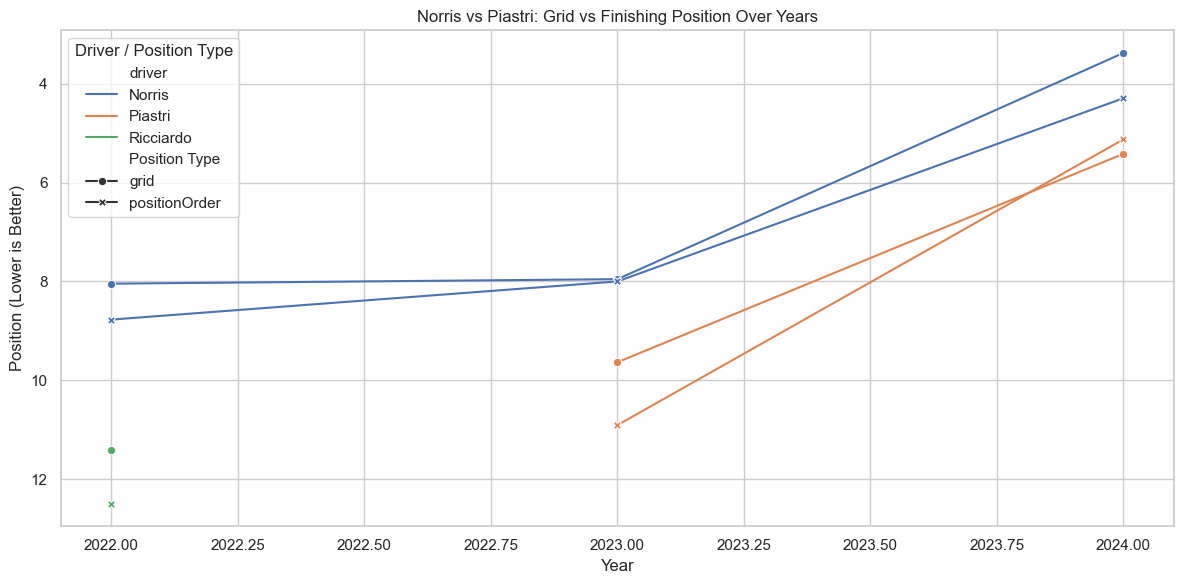

In [73]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted,
             x='year',
             y='Position',
             hue='driver',
             style='Position Type',
             markers=True,
             dashes=False)

plt.title('Norris vs Piastri: Grid vs Finishing Position Over Years')
plt.ylabel('Position (Lower is Better)')
plt.xlabel('Year')
plt.gca().invert_yaxis()  # 1 is better than 20
plt.legend(title='Driver / Position Type')
plt.tight_layout()
plt.show()

we can see here that Piastri has shown movement where PositionOrder (finish) is improved to Grid 

In [86]:
results_df['race_label'] = results_df['year'].astype(str) + ' - ' + results_df['name']

In [87]:
drivers_df = results_df[results_df['driver'].isin(['Norris', 'Piastri'])]

# Create subset for plotting
plot_df = drivers_df[['driver', 'race_label', 'year', 'grid', 'positionOrder']]

# Melt into long format
melted = pd.melt(plot_df,
                 id_vars=['driver', 'race_label', 'year'],
                 value_vars=['grid', 'positionOrder'],
                 var_name='Position Type',
                 value_name='Position')

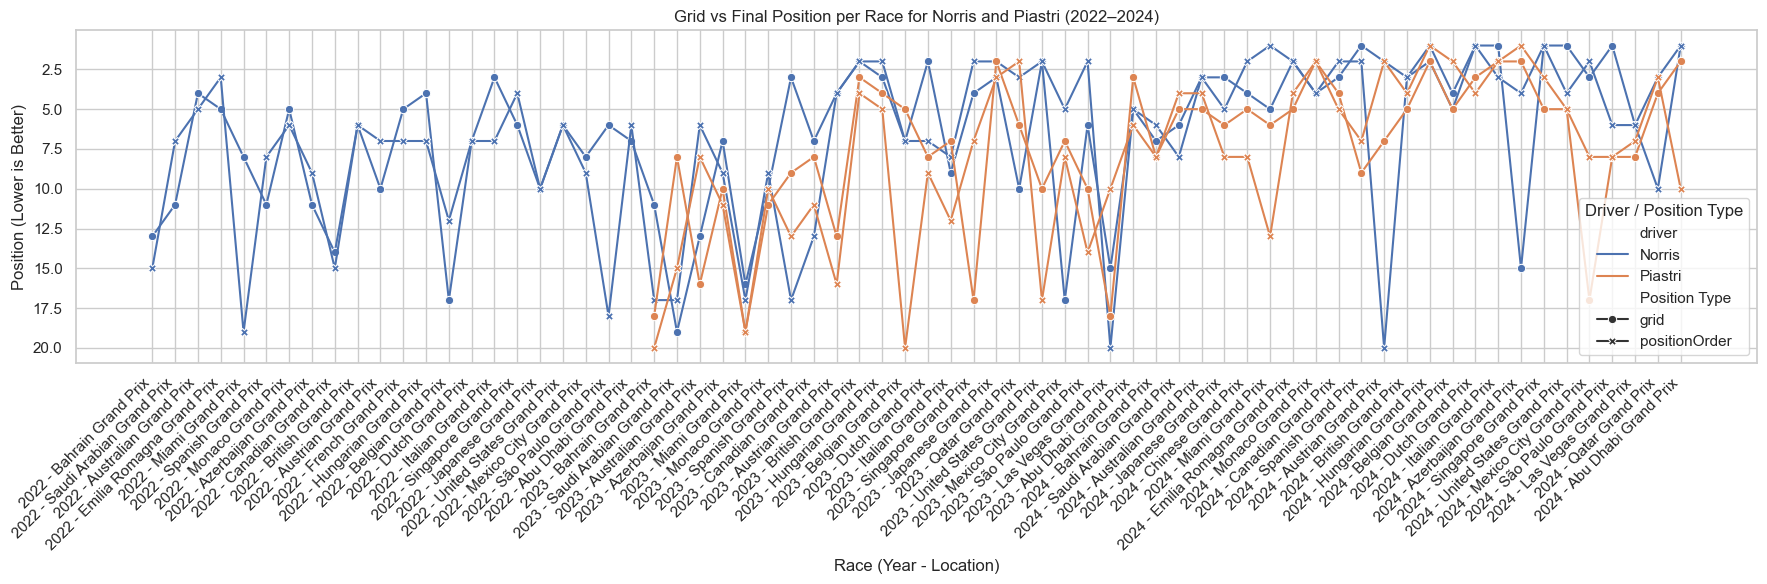

In [88]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=melted,
             x='race_label',
             y='Position',
             hue='driver',
             style='Position Type',
             markers=True,
             dashes=False)

plt.title('Grid vs Final Position per Race for Norris and Piastri (2022–2024)')
plt.ylabel('Position (Lower is Better)')
plt.xlabel('Race (Year - Location)')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()
plt.legend(title='Driver / Position Type')
plt.tight_layout()
plt.show()

In [ ]:
#analysis

In [90]:
# Filter for Norris and Piastri and PositionOrder 1, 2, or 3
pole_position_df = results_df[(results_df['driver'].isin(['Norris', 'Piastri'])) & 
                              (results_df['positionOrder'].isin([1, 2, 3]))]

# Create subset for relevant columns
pole_position_df = pole_position_df[['driver', 'race_label', 'year', 'grid', 'positionOrder']]

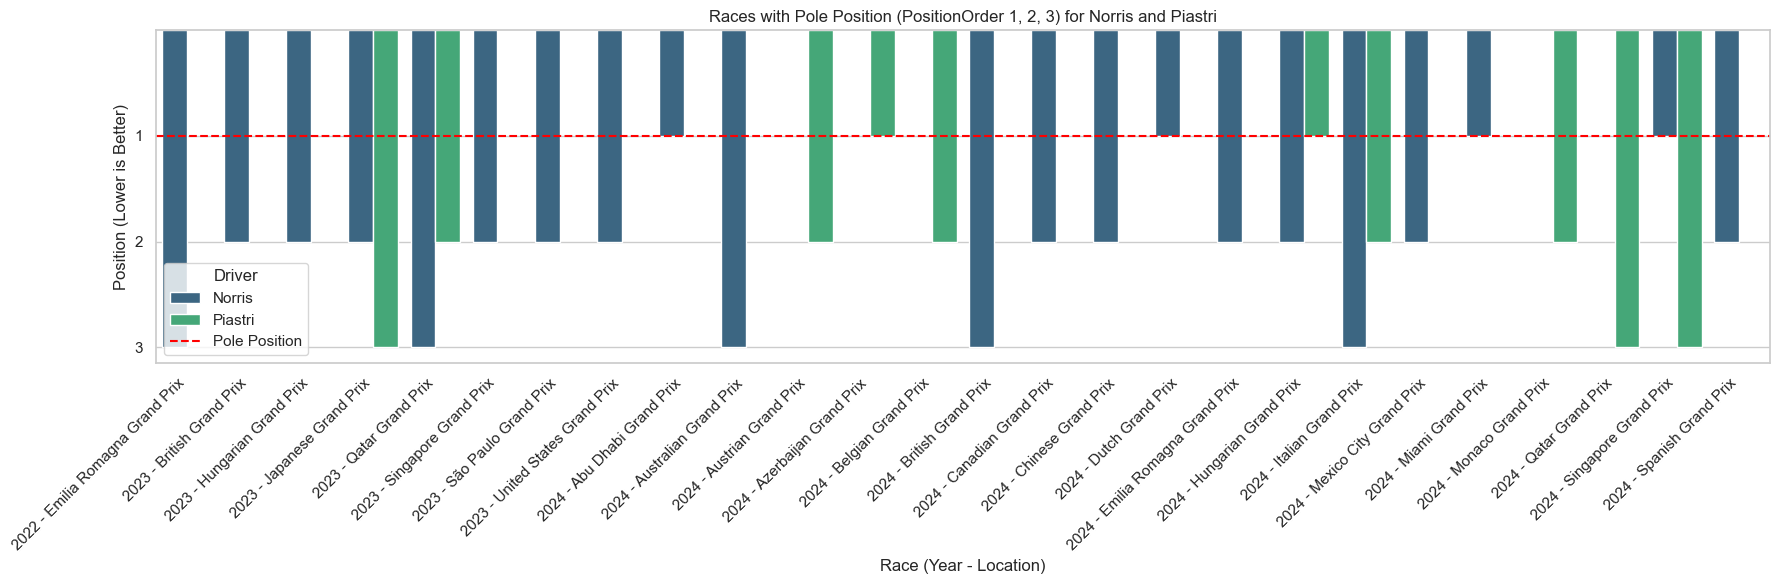

In [93]:
# Sort by race_label and year to maintain chronological order
pole_position_df = pole_position_df.sort_values(by=['year', 'race_label'])

# Create the plot
plt.figure(figsize=(18, 6))
sns.barplot(data=pole_position_df,
            x='race_label',  # Race names on the x-axis
            y='positionOrder',  # Position order on the y-axis (1, 2, 3)
            hue='driver',  # Differentiate by driver (Norris or Piastri)
            dodge=True,  # Separate the bars for each driver
            palette='viridis')  # Color palette for clarity

# Title and labels
plt.title('Races with Pole Position (PositionOrder 1, 2, 3) for Norris and Piastri')
plt.ylabel('Position (Lower is Better)')
plt.xlabel('Race (Year - Location)')

# Limit y-axis to only show positions 1, 2, and 3
plt.yticks([1, 2, 3])  # Set y-axis to only show 1, 2, 3

# Invert y-axis so position 1 is at the top
plt.gca().invert_yaxis()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a horizontal line at Pole Position (1st)
plt.axhline(1, color='red', linestyle='--', label='Pole Position')

# Add legend and adjust layout
plt.legend(title='Driver')
plt.tight_layout()
plt.show()

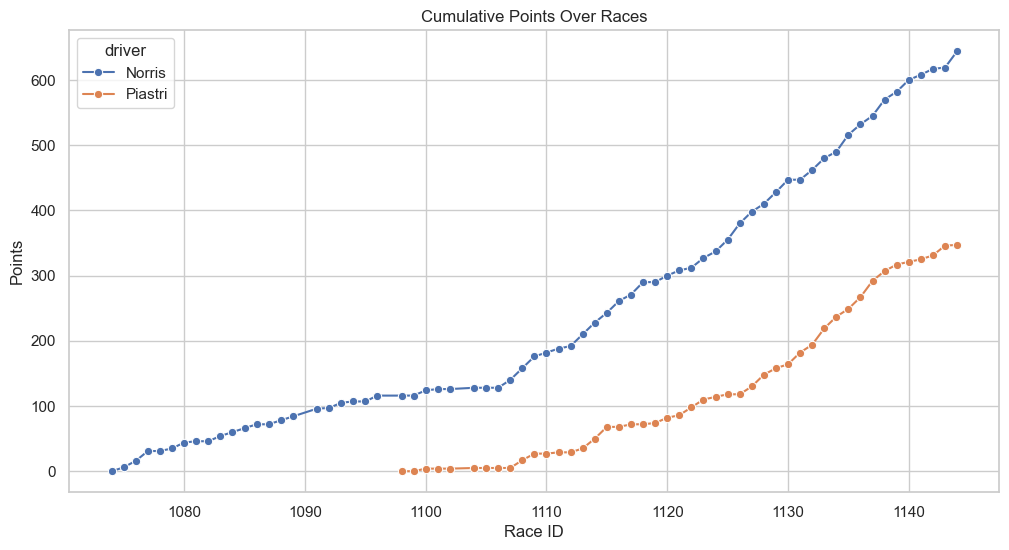

In [111]:
filtered_df = results_df[results_df['driver'].isin(['Norris', 'Piastri'])].copy()
filtered_df = filtered_df.sort_values(by=['driver', 'raceId'])
filtered_df['cumulative_points'] = filtered_df.groupby('driver')['points'].cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='raceId', y='cumulative_points', hue='driver', marker='o')
plt.title('Cumulative Points Over Races')
plt.ylabel('Points')
plt.xlabel('Race ID')
plt.show()

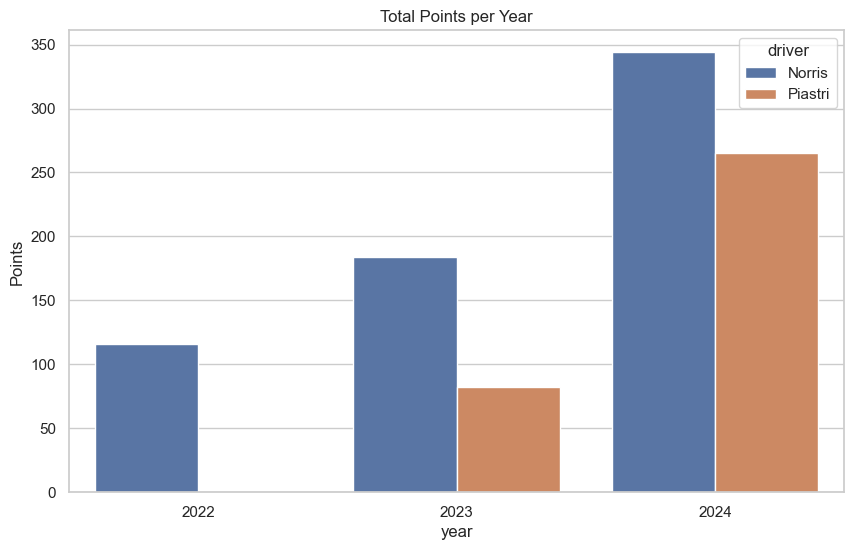

In [112]:
# Group by year and driver
points_by_year = results_df[results_df['driver'].isin(['Norris', 'Piastri'])] \
    .groupby(['year', 'driver'])['points'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=points_by_year, x='year', y='points', hue='driver')
plt.title('Total Points per Year')
plt.ylabel('Points')
plt.show()

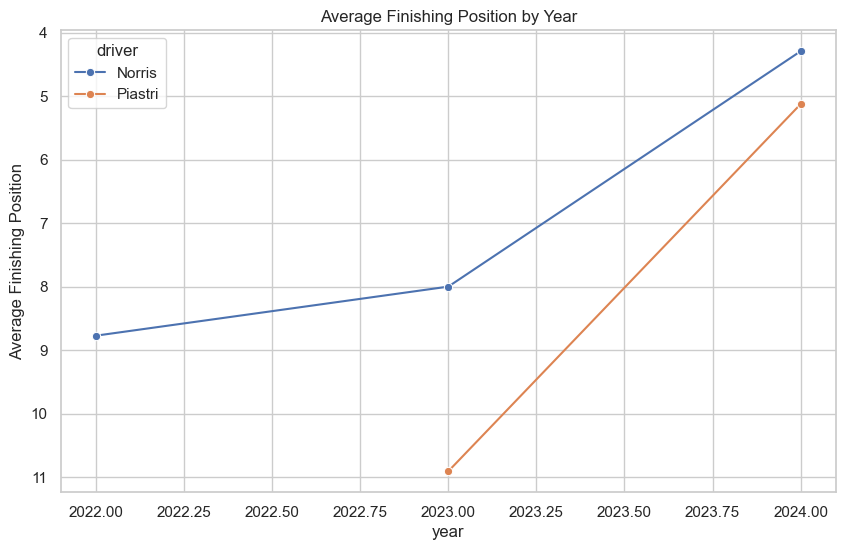

In [113]:
avg_finish = results_df[results_df['driver'].isin(['Norris', 'Piastri'])] \
    .groupby(['year', 'driver'])['positionOrder'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_finish, x='year', y='positionOrder', hue='driver', marker='o')
plt.title('Average Finishing Position by Year')
plt.ylabel('Average Finishing Position')
plt.gca().invert_yaxis()  # Lower is better
plt.show()

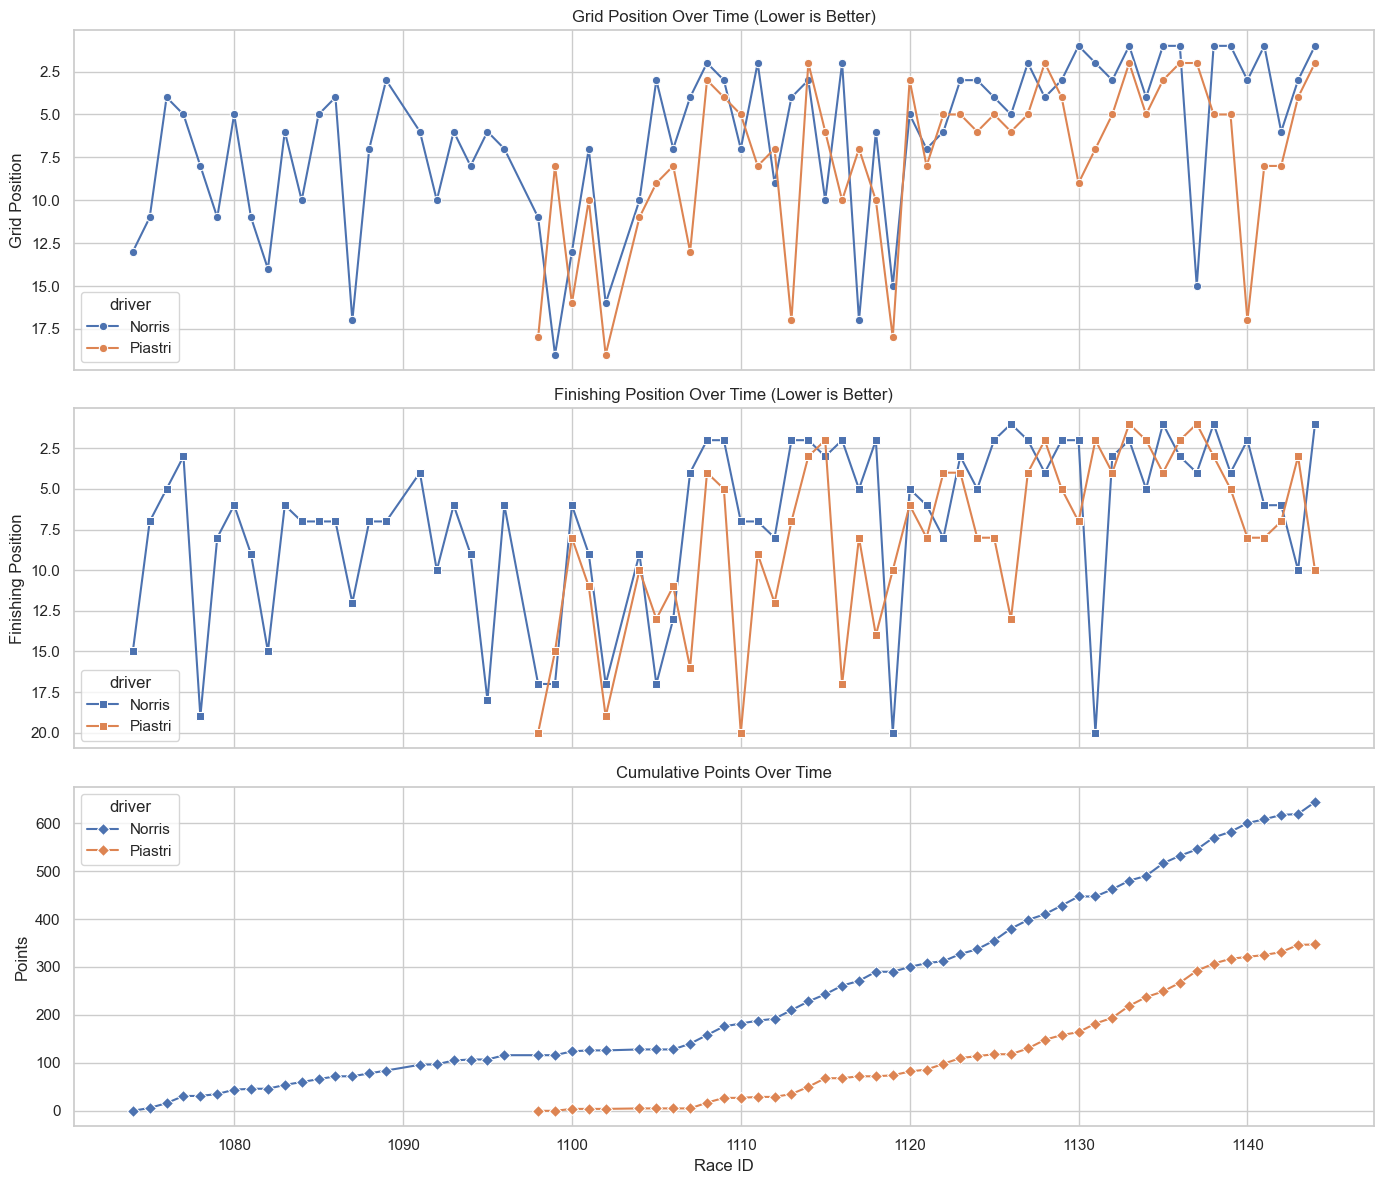

In [110]:
# Filter your full results DataFrame for just Norris and Piastri
# (Make sure you already have a 'driver' column)
filtered_df = results_df[results_df['driver'].isin(['Norris', 'Piastri'])].copy()

# Sort by driver and race order (assuming 'raceId' reflects chronological order)
filtered_df = filtered_df.sort_values(by=['driver', 'raceId'])

# Calculate cumulative points for each driver
filtered_df['cumulative_points'] = filtered_df.groupby('driver')['points'].cumsum()

# Set up subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Grid position over time
sns.lineplot(ax=axes[0], data=filtered_df, x='raceId', y='grid', hue='driver', marker='o')
axes[0].invert_yaxis()  # Lower grid positions are better
axes[0].set_title('Grid Position Over Time (Lower is Better)')
axes[0].set_ylabel('Grid Position')

# Finishing position over time
sns.lineplot(ax=axes[1], data=filtered_df, x='raceId', y='positionOrder', hue='driver', marker='s')
axes[1].invert_yaxis()  # Lower finishing positions are better
axes[1].set_title('Finishing Position Over Time (Lower is Better)')
axes[1].set_ylabel('Finishing Position')

# Cumulative points over time
sns.lineplot(ax=axes[2], data=filtered_df, x='raceId', y='cumulative_points', hue='driver', marker='D')
axes[2].set_title('Cumulative Points Over Time')
axes[2].set_ylabel('Points')
axes[2].set_xlabel('Race ID')

plt.tight_layout()
plt.show()

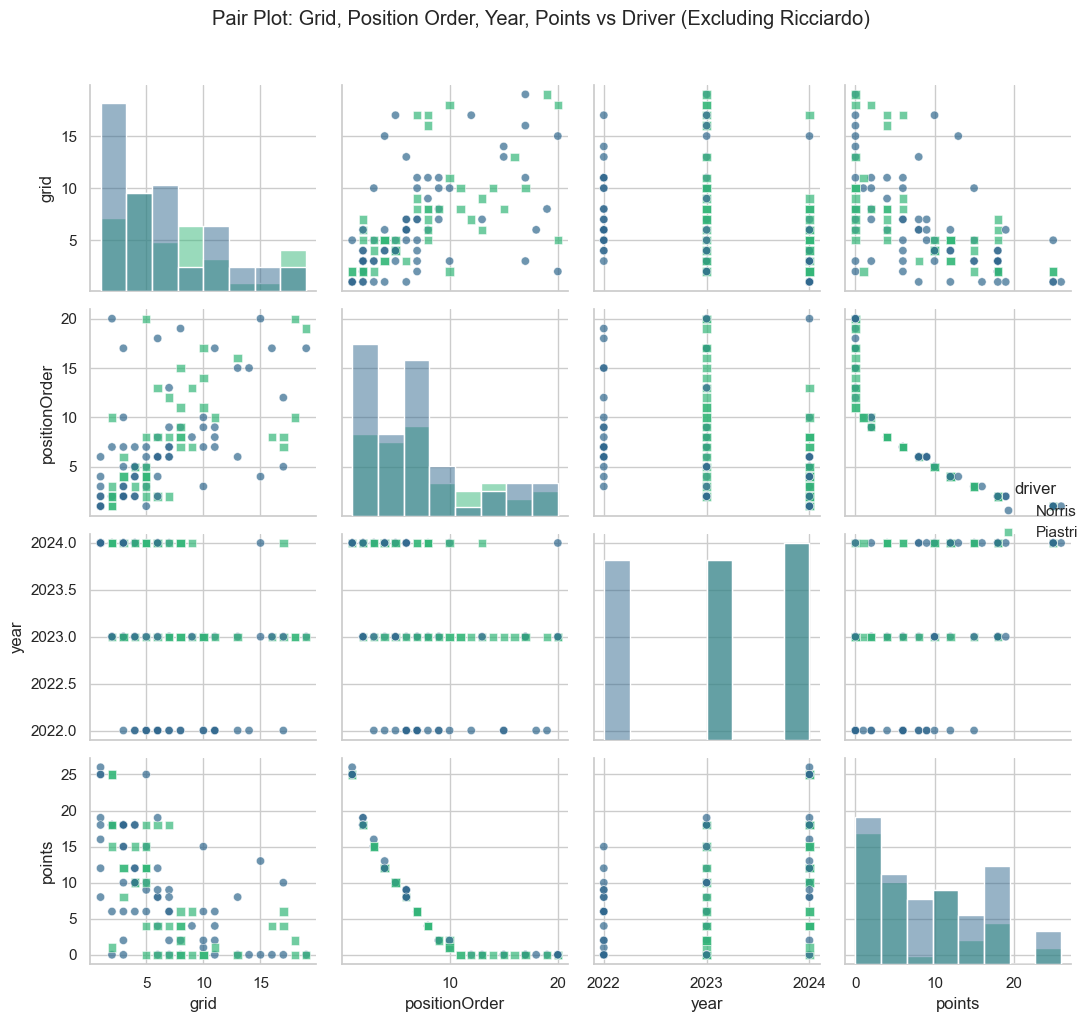

In [101]:
# Remove Ricciardo from the dataframe
filtered_df = results_df[results_df['driver'] != 'Ricciardo']

# Select the relevant columns for the pair plot
pairplot_df = filtered_df[['grid', 'positionOrder', 'year', 'points', 'driver']]

# Create the pair plot
sns.pairplot(pairplot_df, 
             hue='driver',  # Differentiate by driver (Norris, Piastri, etc.)
             palette='viridis',  # Color palette for the drivers
             markers=["o", "s"],  # Use different markers for different drivers
             diag_kind='hist',  # Diagonal shows histograms
             plot_kws={'alpha': 0.7})  # Transparency for the points

# Title for the plot
plt.suptitle('Pair Plot: Grid, Position Order, Year, Points vs Driver (Excluding Ricciardo)', y=1.02)

# Adjust layout to make it look better
plt.tight_layout()
plt.show()

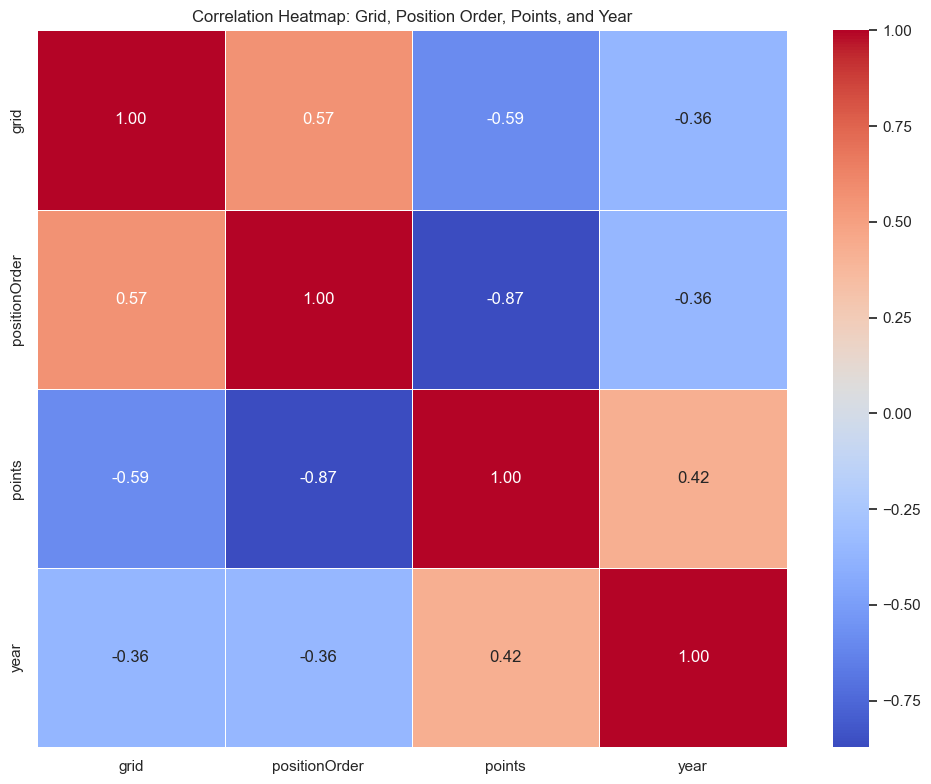

In [103]:
# Remove Ricciardo from the dataset
filtered_df = results_df[results_df['driver'] != 'Ricciardo']

# Select the numeric columns for correlation
corr_df = filtered_df[['grid', 'positionOrder', 'points', 'year']]

# Calculate the correlation matrix
correlation_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and layout adjustments
plt.title('Correlation Heatmap: Grid, Position Order, Points, and Year')
plt.tight_layout()
plt.show()

In [114]:
#coefficient

In [115]:
# Filter for just Norris and Piastri if needed
subset = results_df[results_df['driver'].isin(['Norris', 'Piastri'])]

# Calculate correlation
correlation = subset[['grid', 'positionOrder']].corr(method='pearson')
print(correlation)

                   grid  positionOrder
grid           1.000000       0.565467
positionOrder  0.565467       1.000000


Then:

0.65 is the correlation coefficient between grid and positionOrder.

This is a moderate positive correlation, meaning that the further back a driver starts (higher grid number), the worse they tend to finish.

A perfect positive correlation would be 1.0, and no correlation would be 0.

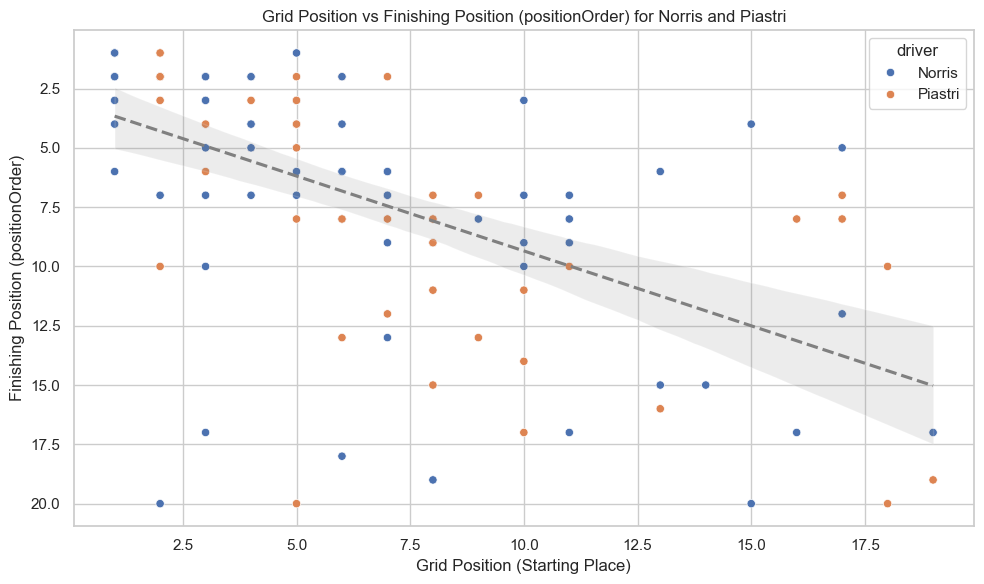

In [116]:
# Filter for Norris and Piastri
subset = results_df[results_df['driver'].isin(['Norris', 'Piastri'])]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset, x='grid', y='positionOrder', hue='driver')

# Line of best fit (optional, for trend)
sns.regplot(data=subset, x='grid', y='positionOrder', scatter=False, color='gray', line_kws={'linestyle':'--'})

# Labels and title
plt.title('Grid Position vs Finishing Position (positionOrder) for Norris and Piastri')
plt.xlabel('Grid Position (Starting Place)')
plt.ylabel('Finishing Position (positionOrder)')
plt.gca().invert_yaxis()  # Lower values are better, so flip y-axis
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#hypotheses analysis and linear regression

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Remove Ricciardo from the dataset
filtered_df = results_df[results_df['driver'] != 'Ricciardo']

# Prepare features (X) and target (y)
X = filtered_df[['grid', 'positionOrder']]  # Independent variables
y_points = filtered_df['points']  # Target variable for points prediction
y_position_order = filtered_df['positionOrder']  # Target variable for positionOrder prediction

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train_points, y_test_points = train_test_split(X, y_points, test_size=0.2, random_state=42)
X_train, X_test, y_train_position_order, y_test_position_order = train_test_split(X, y_position_order, test_size=0.2, random_state=42)

# Train the linear regression model for points prediction
regressor_points = LinearRegression()
regressor_points.fit(X_train, y_train_points)

# Predict using the model
y_pred_points = regressor_points.predict(X_test)

# Model evaluation for points
mse_points = mean_squared_error(y_test_points, y_pred_points)
r2_points = r2_score(y_test_points, y_pred_points)

# Train the linear regression model for positionOrder prediction
regressor_position_order = LinearRegression()
regressor_position_order.fit(X_train, y_train_position_order)

# Predict using the model
y_pred_position_order = regressor_position_order.predict(X_test)

# Model evaluation for positionOrder
mse_position_order = mean_squared_error(y_test_position_order, y_pred_position_order)
r2_position_order = r2_score(y_test_position_order, y_pred_position_order)

# Print model evaluation results
print(f'Points Model - Mean Squared Error: {mse_points:.2f}')
print(f'Points Model - R^2 Score: {r2_points:.2f}')
print(f'Position Order Model - Mean Squared Error: {mse_position_order:.2f}')
print(f'Position Order Model - R^2 Score: {r2_position_order:.2f}')

Points Model - Mean Squared Error: 13.77
Points Model - R^2 Score: 0.75
Position Order Model - Mean Squared Error: 0.00
Position Order Model - R^2 Score: 1.00


1. Points Model
Mean Squared Error (MSE): 13.77

Interpretation: The Mean Squared Error represents the average squared difference between the predicted and actual values of points. A lower MSE indicates better performance, so 13.77 means that, on average, your predictions for points are off by about 13.77 points. While not perfect, this is a relatively reasonable error, and the model has done a decent job predicting points.

R² Score: 0.75

Interpretation: The R² score (coefficient of determination) tells you how well the independent variables (in this case, grid position and positionOrder) explain the variance in the target variable (points).

R² = 0.75 means that 75% of the variance in points is explained by the model, which is a good result. This suggests that grid position and positionOrder are strong predictors of points. However, 25% of the variance is still unexplained, which could be due to other factors not included in the model.

2. Position Order Model
Mean Squared Error (MSE): 0.00

Interpretation: An MSE of 0.00 means that the model’s predicted values are exactly the same as the actual positionOrder values. This is a perfect score, which indicates that the model has perfectly predicted the positionOrder in this case.

Note: This could also indicate overfitting, where the model has memorized the data perfectly, but it may not generalize well to unseen data. This is especially likely if you used very simple features, such as grid and positionOrder, which could be too closely related.

R² Score: 1.00

Interpretation: An R² score of 1.00 means that the model explains 100% of the variance in the positionOrder. It suggests that grid position and positionOrder are perfectly correlated in this dataset, and the model is able to predict positionOrder without error. This again could be a sign of overfitting.

Key Takeaways
The Points Model has a good fit (R² = 0.75), indicating that grid position and positionOrder are fairly predictive of points, with 75% of the variance explained.

The Position Order Model has a perfect fit (R² = 1.00 and MSE = 0.00), but this could be a sign that the model is overfitting to the data. It's likely that grid position directly influences positionOrder, leading to perfect predictions within the training data.

In [108]:
# Add a constant to the model (for the intercept)
X_with_const = sm.add_constant(filtered_df[['grid', 'positionOrder']])

# Create the regression model
model_points = sm.OLS(filtered_df['points'], X_with_const).fit()

# Print the model summary to see p-values
print(model_points.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     187.6
Date:                Tue, 06 May 2025   Prob (F-statistic):           2.47e-36
Time:                        22:06:33   Log-Likelihood:                -305.54
No. Observations:                 114   AIC:                             617.1
Df Residuals:                     111   BIC:                             625.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            18.4702      0.639     28.888

 General Information
Dep. Variable (Dependent Variable): points
This indicates that the target variable you're predicting is points.

R-squared: 0.772
The R-squared value tells you how much of the variance in points is explained by the independent variables (grid and positionOrder) in the model. An R-squared of 0.772 means that 77.2% of the variability in points is explained by the model, which is quite good.

Adj. R-squared: 0.768
The Adjusted R-squared accounts for the number of predictors in the model, making it a more reliable measure for models with multiple predictors. It's slightly lower than the R-squared because it adjusts for the number of variables in the model.

F-statistic: 187.6
The F-statistic tests whether the model is statistically significant. A high F-statistic suggests that at least one of the predictors is significantly related to the dependent variable (points). In this case, the F-statistic is very high, meaning the overall model is a good fit for the data.

Prob (F-statistic): 2.47e-36
The p-value for the F-statistic is extremely small (almost zero), indicating that the model is statistically significant. This means there is a very low chance that the relationship between the independent variables and points happened by random chance.

2. Coefficients
This section tells you how each independent variable (predictor) is related to the dependent variable (points).

const (Intercept): 18.4702
This is the value of points when both grid and positionOrder are equal to 0. While this value might not make sense in the context of your dataset (since a grid position of 0 isn't realistic in racing), it serves as a baseline for predictions.

grid: -0.2257
This coefficient tells you that for each increase in grid position (starting further down the grid), the points are expected to decrease by 0.2257 points on average. This suggests that drivers starting further down the grid tend to score fewer points, which makes sense because grid positions often correlate with finishing positions.

t-statistic: -2.582, p-value: 0.011
The p-value for grid is 0.011, which is below the typical significance threshold of 0.05. This means that grid is a statistically significant predictor of points.

positionOrder: -1.1254
This coefficient tells you that for each increase in positionOrder (which likely means the position a driver finishes in, where 1 is the first place, 2 is second place, etc.), the points are expected to decrease by 1.1254 points on average. The negative value here suggests that a higher positionOrder (i.e., finishing lower in the race) corresponds to fewer points.

t-statistic: -14.375, p-value: 0.000
The p-value for positionOrder is 0.000, which is extremely low, meaning that positionOrder is highly statistically significant in predicting points.

3. Statistical Tests
Omnibus: 9.885, Prob(Omnibus): 0.007
The Omnibus test tests for skewness and kurtosis (the shape of the distribution of residuals). The p-value of 0.007 suggests that the residuals (the differences between the observed and predicted values) might not be perfectly normally distributed.

Durbin-Watson: 2.010
This test checks for autocorrelation in the residuals (whether the residuals from one observation are related to the residuals from another). A value close to 2 suggests no autocorrelation, which is the case here (2.010), meaning the residuals are independent.

Jarque-Bera (JB): 10.783, Prob(JB): 0.00455
The Jarque-Bera test also checks for normality of residuals. A p-value of 0.00455 suggests that the residuals may deviate from a normal distribution (although the p-value is not extremely small, it's something to note).

Skew: 0.750
This indicates that the distribution of residuals is slightly skewed to the right. In a perfect normal distribution, this value would be 0.

Kurtosis: 2.854
This measures the "tailedness" of the distribution of residuals. A value of 3 indicates a normal distribution, so your residuals are slightly less "heavy-tailed" than a normal distribution.

4. Conclusion
The model is statistically significant, with grid position and positionOrder being important predictors of points.

Grid and positionOrder both have negative relationships with points, meaning that as a driver starts lower in the grid or finishes in a lower position, they score fewer points.

The model explains 77.2% of the variability in points, which is fairly good.

The residuals indicate some minor non-normality, but overall, the model seems to fit well.